In [1]:
# Install required packages
!pip install -q -U bitsandbytes
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git
!pip install -q -U einops
!pip install -q -U safetensors

In [ ]:
# get your hugging face hub token with write access from hugging face account - its free
import os
os.environ['HUGGING_FACE_HUB_TOKEN'] = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

In [ ]:
# load the model from transformers - you need atleast 20 gigs of RAM and 40 GB of memory
from transformers import AutoModelForCausalLM, AutoTokenizer

model_id = "tiiuae/falcon-7b-instruct"

model = AutoModelForCausalLM.from_pretrained(
        model_id, 
        device_map="auto",
        offload_folder = "offload",
        trust_remote_code=True)

tokenizer = AutoTokenizer.from_pretrained(model_id)

In [ ]:
print(model)

# if have you loaded your model correctly, you will see an output like below

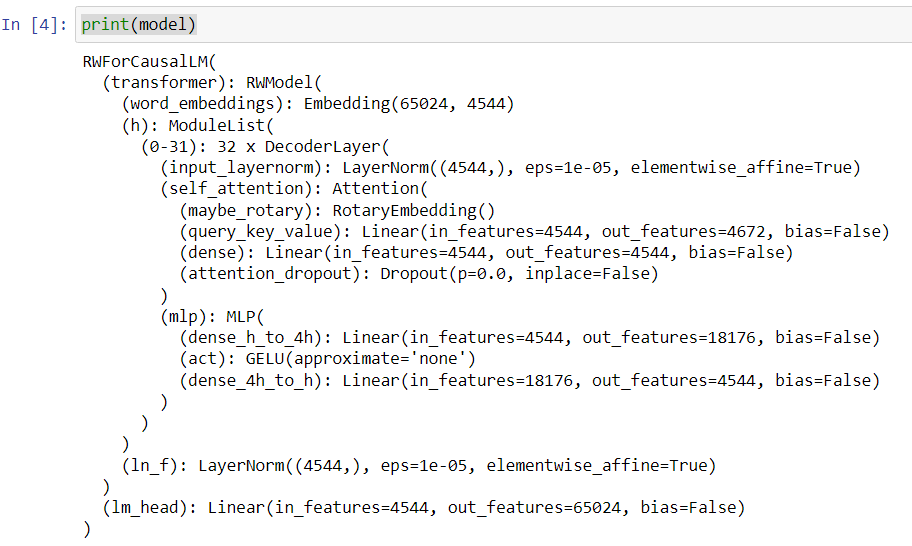

In [ ]:
# provide a remote path, its like a repo name where your model is gonna get saved in huggingface hub
REMOTE_PATH = "falcon-7b-instruct-sharded"

# push tokenizer to hub
tokenizer.push_to_hub(REMOTE_PATH)

# CRUCIAL STEP - As model is bigger we are sharding it into small portion to load it with less RAM memory
model.push_to_hub(REMOTE_PATH,                   
                  max_shard_size="2GB", 
                  safe_serialization=True)